Game 5: Dodgers vs. Cubs

In [1]:
import requests

In [2]:
game_id = '361101105'#361020119'

In [3]:
game_url = 'https://api-secure.sports.yahoo.com/v1/editorial/s/boxscore/mlb.g.' + game_id + '?lang=en-US&region=US&tz=America%2FChicago&ysp_redesign=1&mode=&v=4&ysp_enable_last_update=1&polling=1'

In [4]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.10; rv:39.0) Gecko/20100101 Firefox/39.0'}
response = requests.get(game_url, headers=headers)
game_data = response.json()

In [5]:
pitches = game_data['service']['boxscore']['gamepitches']['mlb.g.'+game_id]

In [6]:
play_by_play = game_data['service']['boxscore']['gameplay_by_play']['mlb.g.'+game_id]

In [7]:
print("Total number of pitches thrown during the game: " + str(len(pitches)))

Total number of pitches thrown during the game: 305


In [8]:
import pandas as pd

Convert the pitches to a pandas DataFrame

In [9]:
df_pbp = pd.DataFrame(play_by_play)

need to change data types first

In [10]:
transpose_df_pbd = df_pbp.transpose()

In [11]:
for val in list(transpose_df_pbd.columns.values):
    transpose_df_pbd[val] = transpose_df_pbd[val].convert_objects(convert_numeric=True)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [12]:
sorted_polay_by_play = transpose_df_pbd.sort_values(['play_num'])

In [13]:
sorted_polay_by_play[sorted_polay_by_play.ball_hit==1]

,away_score,ball_hit,batter,errors,hit_angle,hit_distance,hit_hardness,hit_style,hits,home_score,period,pitcher,pitches_ids,play_num,play_time,play_type,players,runs,text
10401,NaN,1,8370,NaN,-31,115,2,4,NaN,NaN,0,8769,NaN,10401,1478045470,RESULT,8370,NaN,[mlb.p.8370] lined out to third
20101,NaN,1,9861,NaN,35,152,2,3,NaN,NaN,0,8769,20100,20101,1478045512,RESULT,9861,NaN,"[mlb.p.9861] grounded out, second to first"
30301,1,1,9558,NaN,-22,433,3,2,NaN,0,0,8769,NaN,30301,1478045592,RESULT,9558,1,[mlb.p.9558] homered (433 ft.) to deep left ce...
40301,NaN,1,8868,NaN,14,230,3,4,NaN,NaN,0,8769,NaN,40301,1478045688,RESULT,8868,NaN,[mlb.p.8868] singled to right center
50201,NaN,1,7829,NaN,18,205,2,4,NaN,NaN,0,8769,NaN,50201,1478045778,RESULT,NaN,NaN,"[mlb.p.7829] singled to right center, [mlb.p.8..."
60301,3,1,9604,NaN,14,256,2,2,NaN,0,0,8769,NaN,60301,1478045958,RESULT,NaN,2,"[mlb.p.9604] doubled to right center, [mlb.p.8..."
70601,NaN,1,10166,NaN,14,269,2,2,NaN,NaN,0,8769,NaN,70601,1478046159,RESULT,10166,NaN,[mlb.p.10166] flied out to center
1020401,NaN,1,8853,NaN,14,149,2,3,NaN,NaN,1,8623,NaN,1020401,1478046497,RESULT,8853,NaN,"[mlb.p.8853] grounded out, second to first"
2010101,NaN,1,8621,NaN,23,331,3,2,NaN,NaN,2,8769,2010100,2010101,1478047054,RESULT,8621,NaN,[mlb.p.8621] flied out to right
2020401,NaN,1,9557,NaN,-2,133,2,3,NaN,NaN,2,8769,NaN,2020401,1478047160,RESULT,9557,NaN,"[mlb.p.9557] grounded out, second to first"


In [14]:
hits = sorted_polay_by_play[sorted_polay_by_play.ball_hit==1]

In [21]:
import numpy as np

In [17]:
hits.dtypes

away_score      float64
ball_hit        float64
batter          float64
errors          float64
hit_angle       float64
hit_distance    float64
hit_hardness    float64
hit_style       float64
hits            float64
home_score      float64
period            int64
pitcher         float64
pitches_ids     float64
play_num          int64
play_time         int64
play_type        object
players         float64
runs            float64
text             object
dtype: object

In [35]:
x =  hits.hit_distance * np.cos(hits.hit_angle*np.pi/180)
y =  hits.hit_distance * np.sin(hits.hit_angle*np.pi/180)

In [36]:
print(x)

10401        98.574240
20101       124.511111
30301       401.470609
40301       223.168017
50201       194.966586
60301       248.395706
70601       261.009550
1020401     144.574063
2010101     304.687106
2020401     132.918980
2030301     192.346024
3030401      75.430722
4020101     209.583877
4030601     158.903141
4040401     221.860625
4050301     427.406565
4060301     128.079036
4070501     197.909857
5020301     281.449696
5030301      88.468421
6030201     273.436369
7010401     365.801489
7030601     231.429822
7040301     260.039255
8010301     119.596198
8020401     106.355146
9020401      55.954509
9030501     341.203658
9040201      90.925877
10020701    210.522075
10030301    157.134459
10040101    246.201938
11020701    288.354179
11040101    149.425542
12010201    195.917642
12020801    238.692749
12030401    219.187605
12040101    303.189120
12050401     87.817494
13010301    281.828213
13030401    350.071707
13040301    238.715186
13050201     91.745029
14020301   

In [37]:
print(y)

10401       -59.229379
20101        87.183618
30301      -162.204655
40301        55.642036
50201        63.348484
60301        61.932005
70601        65.076990
1020401      36.046362
2010101     129.332004
2020401      -4.641633
2030301     179.365569
3030401     -45.323351
4020101      52.255129
4030601       5.549020
4040401     113.043634
4050301     -75.363309
4060301     -31.933690
4070501     -20.801164
5020301      29.581555
5030301      61.946255
6030201    -164.297146
7010401     -91.204555
7030601     -40.807322
7040301      64.835068
8010301     -83.742160
8020401    -131.337667
9020401      45.311068
9030501    -137.855226
9040201      63.666984
10020701    147.409144
10030301    -16.515497
10040101    -43.412044
11020701   -116.502651
11040101    -37.255972
12010201    -63.657501
12020801    -59.512786
12030401    111.681663
12040101   -122.496356
12050401    -71.113204
13010301      9.841658
13030401     36.794019
13040301     77.563266
13050201     64.240561
14020301   

In [38]:
hits['x'] = pd.Series(x)
hits['y'] = pd.Series(y)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [48]:
hits['out'] = pd.Series(hits.text.str.contains('out'))

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
hits

,away_score,ball_hit,batter,errors,hit_angle,hit_distance,hit_hardness,hit_style,hits,home_score,...,pitches_ids,play_num,play_time,play_type,players,runs,text,x,y,out
10401,NaN,1,8370,NaN,-31,115,2,4,NaN,NaN,...,NaN,10401,1478045470,RESULT,8370,NaN,[mlb.p.8370] lined out to third,98.574240,-59.229379,True
20101,NaN,1,9861,NaN,35,152,2,3,NaN,NaN,...,20100,20101,1478045512,RESULT,9861,NaN,"[mlb.p.9861] grounded out, second to first",124.511111,87.183618,True
30301,1,1,9558,NaN,-22,433,3,2,NaN,0,...,NaN,30301,1478045592,RESULT,9558,1,[mlb.p.9558] homered (433 ft.) to deep left ce...,401.470609,-162.204655,False
40301,NaN,1,8868,NaN,14,230,3,4,NaN,NaN,...,NaN,40301,1478045688,RESULT,8868,NaN,[mlb.p.8868] singled to right center,223.168017,55.642036,False
50201,NaN,1,7829,NaN,18,205,2,4,NaN,NaN,...,NaN,50201,1478045778,RESULT,NaN,NaN,"[mlb.p.7829] singled to right center, [mlb.p.8...",194.966586,63.348484,False
60301,3,1,9604,NaN,14,256,2,2,NaN,0,...,NaN,60301,1478045958,RESULT,NaN,2,"[mlb.p.9604] doubled to right center, [mlb.p.8...",248.395706,61.932005,False
70601,NaN,1,10166,NaN,14,269,2,2,NaN,NaN,...,NaN,70601,1478046159,RESULT,10166,NaN,[mlb.p.10166] flied out to center,261.009550,65.076990,True
1020401,NaN,1,8853,NaN,14,149,2,3,NaN,NaN,...,NaN,1020401,1478046497,RESULT,8853,NaN,"[mlb.p.8853] grounded out, second to first",144.574063,36.046362,True
2010101,NaN,1,8621,NaN,23,331,3,2,NaN,NaN,...,2010100,2010101,1478047054,RESULT,8621,NaN,[mlb.p.8621] flied out to right,304.687106,129.332004,True
2020401,NaN,1,9557,NaN,-2,133,2,3,NaN,NaN,...,NaN,2020401,1478047160,RESULT,9557,NaN,"[mlb.p.9557] grounded out, second to first",132.918980,-4.641633,True


In [29]:
sorted_polay_by_play

,away_score,ball_hit,batter,errors,hit_angle,hit_distance,hit_hardness,hit_style,hits,home_score,...,pitcher,pitches_ids,play_num,play_time,play_type,players,runs,text,x,y
10401,NaN,1,8370,NaN,-31,115,2,4,NaN,NaN,...,8769,NaN,10401,1478045470,RESULT,8370,NaN,[mlb.p.8370] lined out to third,105.195371,46.464329
20101,NaN,1,9861,NaN,35,152,2,3,NaN,NaN,...,8769,20100,20101,1478045512,RESULT,9861,NaN,"[mlb.p.9861] grounded out, second to first",-137.361215,-65.083766
30301,1,1,9558,NaN,-22,433,3,2,NaN,0,...,8769,NaN,30301,1478045592,RESULT,9558,1,[mlb.p.9558] homered (433 ft.) to deep left ce...,-432.983038,3.832617
40301,NaN,1,8868,NaN,14,230,3,4,NaN,NaN,...,8769,NaN,40301,1478045688,RESULT,8868,NaN,[mlb.p.8868] singled to right center,31.449560,227.839692
50201,NaN,1,7829,NaN,18,205,2,4,NaN,NaN,...,8769,NaN,50201,1478045778,RESULT,NaN,NaN,"[mlb.p.7829] singled to right center, [mlb.p.8...",135.364925,-153.952386
60301,3,1,9604,NaN,14,256,2,2,NaN,0,...,8769,NaN,60301,1478045958,RESULT,NaN,2,"[mlb.p.9604] doubled to right center, [mlb.p.8...",35.004728,253.595483
70601,NaN,1,10166,NaN,14,269,2,2,NaN,NaN,...,8769,NaN,70601,1478046159,RESULT,10166,NaN,[mlb.p.10166] flied out to center,36.782312,266.473379
999999,3,NaN,NaN,1,NaN,NaN,NaN,NaN,4,0,...,NaN,NaN,999999,1478046159,INNING,NaN,3,"Middle of Inning (3 Runs, 4 Hits, 1 Error)",NaN,NaN
1010401,NaN,0,8619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8623,NaN,1010401,1478046406,RESULT,8619,NaN,[mlb.p.8619] struck out swinging,NaN,NaN
1020401,NaN,1,8853,NaN,14,149,2,3,NaN,NaN,...,8623,NaN,1020401,1478046497,RESULT,8853,NaN,"[mlb.p.8853] grounded out, second to first",20.373846,147.600496


In [9]:
df = pd.DataFrame(pitches)

In [10]:
df.head()

,10010100,10020100,10020200,10020300,10020400,10020500,10020600,10030100,10030200,10040100,...,9020200,9020300,9020400,9020500,9030100,9030200,9030300,9030400,9030500,9030600
balls,0,0,1,2,2,3,3,0,0,0,...,0,1,1,1,0,1,1,1,1,2
batter,9557,8621,8621,8621,8621,8621,8621,9604,9604,6956,...,7710,7710,7710,7710,9754,9754,9754,9754,9754,9754
game,361020119,361020119,361020119,361020119,361020119,361020119,361020119,361020119,361020119,361020119,...,361020119,361020119,361020119,361020119,361020119,361020119,361020119,361020119,361020119,361020119
horizontal,-11667,-16667,-15000,8333,-16667,-6667,-16667,-5000,-1667,-8333,...,11667,8333,16667,15000,5000,-8333,6667,16667,-15000,8333
period,10,10,10,10,10,10,10,10,10,10,...,9,9,9,9,9,9,9,9,9,9


I need to transpose the DataFrame so that "balls", "strikes", "velocity", etc. become the column headers.

In [11]:
transposed_df = df.transpose()

In [12]:
transposed_df.head()

,balls,batter,game,horizontal,period,pitch_num,pitch_type,pitcher,play_num,play_type,result,sequence,strikes,velocity,vertical
10010100,0,9557,361020119,-11667,10,1,3,7461,10010100,PITCH,10,1,0,87,0
10020100,0,8621,361020119,-16667,10,1,1,7461,10020100,PITCH,0,1,0,90,13333
10020200,1,8621,361020119,-15000,10,2,1,7461,10020200,PITCH,0,2,0,90,6667
10020300,2,8621,361020119,8333,10,3,2,7461,10020300,PITCH,2,3,0,80,6667
10020400,2,8621,361020119,-16667,10,4,3,7461,10020400,PITCH,0,4,1,86,-13333


It appears that all of the elements in the DataFrame are strings. Let me check to see what type of object they are.

In [13]:
transposed_df.dtypes

balls         object
batter        object
game          object
horizontal    object
period        object
pitch_num     object
pitch_type    object
pitcher       object
play_num      object
play_type     object
result        object
sequence      object
strikes       object
velocity      object
vertical      object
dtype: object

They are all DataFrame objects. I want to convert all of them exept "PLAY_TYPE" to numeric fields.

In [16]:
for val in list(transposed_df.columns.values):
    transposed_df[val] = transposed_df[val].convert_objects(convert_numeric=True)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [17]:
transposed_df.dtypes

balls          int64
batter         int64
game           int64
horizontal     int64
period         int64
pitch_num      int64
pitch_type     int64
pitcher        int64
play_num       int64
play_type     object
result         int64
sequence       int64
strikes        int64
velocity       int64
vertical       int64
dtype: object

In [56]:
sorted_df = transposed_df.sort_values(['play_num'])

Who were the pitchers? Who were the batters I can get the names of thenpitchers and batters using BeautifulSoup and the yahoo.com url for each player. Here, I want to know who the starting pitcher was and who the first batter was.

In [19]:
from bs4 import BeautifulSoup

In [73]:
pitcher_url = 'http://sports.yahoo.com/mlb/players/' + str(sorted_df['pitcher']['10100']) + '/'
req = requests.get(pitcher_url)
html = req.text
soup = BeautifulSoup(html, 'html.parser')
print("On the mound to start the game: " + soup.title.string)
batter_url = 'http://sports.yahoo.com/mlb/players/' + str(sorted_df['batter']['10100']) + '/'
req = requests.get(batter_url)
html = req.text
soup = BeautifulSoup(html, 'html.parser')
print("First batter faced: " + soup.title.string)

On the mound to start the game: Kenta Maeda | LA Dodgers | Major League Baseball | Yahoo! Sports
First batter faced: Dexter Fowler | Chi Cubs | Major League Baseball | Yahoo! Sports


I can list all of the pitchers who played.

In [75]:
pitcher_list = sorted_df.pitcher.unique()
for pitcher in pitcher_list:
    pitcher_url = 'http://sports.yahoo.com/mlb/players/' + str(pitcher) + '/'
    req = requests.get(pitcher_url)
    html = req.text
    soup = BeautifulSoup(html, 'html.parser')
    pitcher_info = soup.title.string
    print(pitcher_info.split('|')[0] + " of the " + pitcher_info.split('|')[1])

Kenta Maeda  of the  LA Dodgers 
Jon Lester  of the  Chi Cubs 
Josh Fields  of the  LA Dodgers 
Grant Dayton  of the  LA Dodgers 
Joe Blanton  of the  LA Dodgers 
Luis Avilán  of the  LA Dodgers 
Pedro Báez  of the  LA Dodgers 
Ross Stripling  of the  LA Dodgers 
Pedro Strop  of the  Chi Cubs 
Aroldis Chapman  of the  Chi Cubs 


Next I want to plot pitch velocity per "period"

In [30]:
import matplotlib.pyplot as plt

In [31]:
%matplotlib inline

In [53]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
pbp_hits = plt.plot(hits[hits.out==False].x, hits[hits.out==False].y, 'b.')
plt.xlim(0, 500)
plt.ylim(-250,25
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#          ncol=3, fancybox=True, shadow=True)

SyntaxError: unexpected EOF while parsing (<ipython-input-53-76ea441dad56>, line 7)

In [51]:
len(hits[hits.out==False].x)

18

In [56]:
hits

,away_score,ball_hit,batter,errors,hit_angle,hit_distance,hit_hardness,hit_style,hits,home_score,...,pitches_ids,play_num,play_time,play_type,players,runs,text,x,y,out
10401,NaN,1,8370,NaN,-31,115,2,4,NaN,NaN,...,NaN,10401,1478045470,RESULT,8370,NaN,[mlb.p.8370] lined out to third,98.574240,-59.229379,True
20101,NaN,1,9861,NaN,35,152,2,3,NaN,NaN,...,20100,20101,1478045512,RESULT,9861,NaN,"[mlb.p.9861] grounded out, second to first",124.511111,87.183618,True
30301,1,1,9558,NaN,-22,433,3,2,NaN,0,...,NaN,30301,1478045592,RESULT,9558,1,[mlb.p.9558] homered (433 ft.) to deep left ce...,401.470609,-162.204655,False
40301,NaN,1,8868,NaN,14,230,3,4,NaN,NaN,...,NaN,40301,1478045688,RESULT,8868,NaN,[mlb.p.8868] singled to right center,223.168017,55.642036,False
50201,NaN,1,7829,NaN,18,205,2,4,NaN,NaN,...,NaN,50201,1478045778,RESULT,NaN,NaN,"[mlb.p.7829] singled to right center, [mlb.p.8...",194.966586,63.348484,False
60301,3,1,9604,NaN,14,256,2,2,NaN,0,...,NaN,60301,1478045958,RESULT,NaN,2,"[mlb.p.9604] doubled to right center, [mlb.p.8...",248.395706,61.932005,False
70601,NaN,1,10166,NaN,14,269,2,2,NaN,NaN,...,NaN,70601,1478046159,RESULT,10166,NaN,[mlb.p.10166] flied out to center,261.009550,65.076990,True
1020401,NaN,1,8853,NaN,14,149,2,3,NaN,NaN,...,NaN,1020401,1478046497,RESULT,8853,NaN,"[mlb.p.8853] grounded out, second to first",144.574063,36.046362,True
2010101,NaN,1,8621,NaN,23,331,3,2,NaN,NaN,...,2010100,2010101,1478047054,RESULT,8621,NaN,[mlb.p.8621] flied out to right,304.687106,129.332004,True
2020401,NaN,1,9557,NaN,-2,133,2,3,NaN,NaN,...,NaN,2020401,1478047160,RESULT,9557,NaN,"[mlb.p.9557] grounded out, second to first",132.918980,-4.641633,True


In [61]:
pd.options.display.max_colwidth = 100
print(hits[hits.out==True].text)

10401                                                                 [mlb.p.8370] lined out to third
20101                                                      [mlb.p.9861] grounded out, second to first
70601                                                               [mlb.p.10166] flied out to center
1020401                                                    [mlb.p.8853] grounded out, second to first
2010101                                                               [mlb.p.8621] flied out to right
2020401                                                    [mlb.p.9557] grounded out, second to first
2030301                                                               [mlb.p.8370] flied out to right
3030401                                                     [mlb.p.6983] grounded out, third to first
4020101                                                              [mlb.p.9558] popped out to right
4060301                                                [mlb.p.10166] grounded out,

(-250, 250)

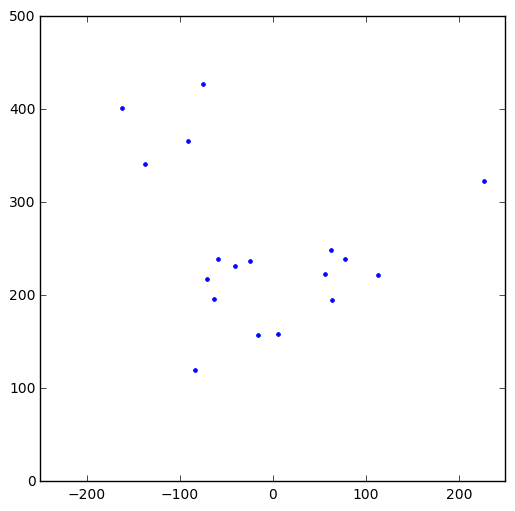

In [63]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
pbp_plot = plt.plot(hits[hits.out==False].y, hits[hits.out==False].x, 'b.')
plt.ylim(0,500)
plt.xlim(-250,250)

In [57]:
dodgers_pitchers = sorted_df[sorted_df.period%2 == 0]
cubs_pitchers = sorted_df[sorted_df.period%2 != 0]

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


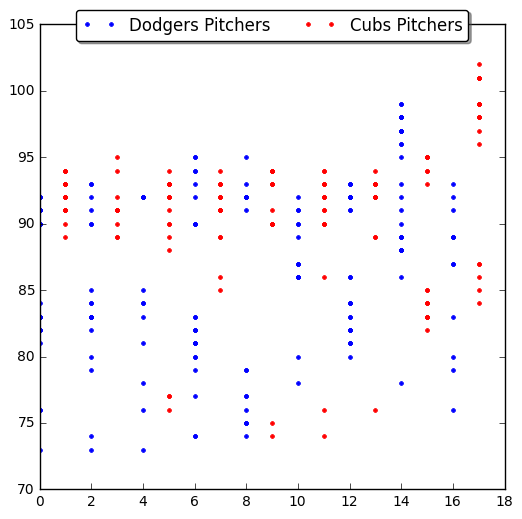

In [34]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
p1 = plt.plot(dodgers_pitchers.period, dodgers_pitchers.velocity, 'b.', label='Dodgers Pitchers')
p2 = plt.plot(cubs_pitchers.period, cubs_pitchers.velocity, 'r.', label='Cubs Pitchers')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

Next, I want to look at Yahoo!'s pitch location. 

In [70]:
balls = sorted_df[sorted_df.result == 0]
strikes = sorted_df[sorted_df.result != 0]

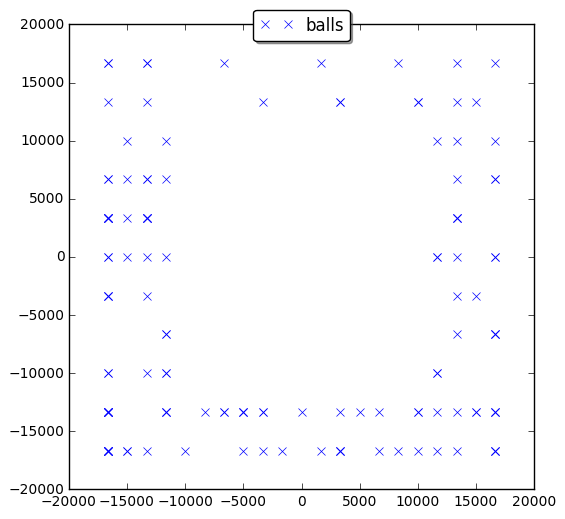

In [78]:
plt.figure(figsize=(6,6))
ax1 = plt.subplot(111)
#plot_strikes = plt.plot(strikes.horizontal, strikes.vertical, 'ro', label='strikes')
plot_balls = plt.plot(balls.horizontal, balls.vertical, 'bx', label='balls')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)